In [46]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

from tensorflow import keras
from keras import layers
from keras.layers import Dense
from keras.models import Sequential, load_model

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import scale

import warnings

warnings.filterwarnings('ignore')

<h3>1) Data preparation and stardartization</h3>

In [47]:
df = pd.read_csv('./data/regresion_data.csv')

df = df.drop(columns='Unnamed: 0')
df = df.drop(columns='label')

df

,axial_max,tang_max,index_of_axm,index_of_tnm,axial_in_mxt,tang_in_mxa,cone_angl,frequancy
0,-16.549675,-17.654378,28,48,-10.975493,-16.597827,4,126.984123
1,-16.564726,-17.815883,28,52,-14.410172,-16.724255,4,126.984123
2,-16.335568,-17.578816,28,50,-12.664116,-16.415995,4,125.152626
3,-15.968865,-17.108087,28,47,-10.236513,-15.878571,4,120.879120
4,-15.227270,-16.266240,28,49,-12.056063,-15.246275,4,114.774117
...,...,...,...,...,...,...,...,...
701,-12.023019,-7.729243,22,39,-9.648130,-6.059585,15,76.312576
702,-12.288681,-7.505596,25,40,-10.345298,-5.331225,15,77.533577
703,-12.301400,-7.318260,23,40,-10.514462,-5.200852,15,78.754578
704,-12.464419,-6.943085,23,39,-9.774318,-4.769759,15,77.533577


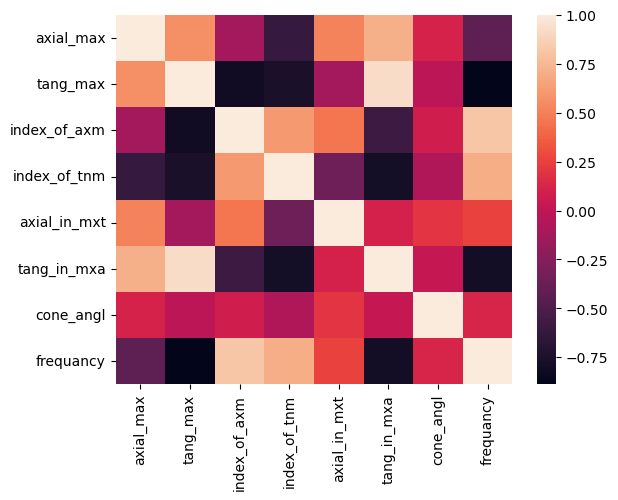

In [48]:
# Let's build correlation and some graphs
sns.heatmap(df.corr())

# And some estimators
print()

In [49]:
X = df.drop(columns='frequancy')
y = df['frequancy']



# standartization and train test split
mean = X.mean(axis=0)
std = X.std(axis=0)
X -= mean
X /= std
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape[1])


7


<h3>2) Simple model for regression</h3>

In [107]:
model = Sequential()
'''
model.add(Dense(7, activation='relu', input_shape = (X_train.shape[1], )))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
# model.add(layers.Dropout(0.5))
model.add(Dense(256, activation='relu'))
# model.add(layers.Dropout(0.25))
model.add(Dense(512, activation='relu'))
# model.add(layers.Dropout(0.4))
model.add(Dense(256, activation='relu'))
# model.add(layers.Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
'''
model.add(Dense(7, activation='relu', input_shape = (X_train.shape[1], )))

model.add(Dense(14, activation='relu'))

model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'])



In [108]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=200)

Epoch 1/200
15/15 [==============================] - 1s 9ms/step - loss: 6461.3188 - mse: 6461.3188 - mae: 64.7133 - val_loss: 7149.1992 - val_mse: 7149.1992 - val_mae: 72.7637
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 6428.4761 - mse: 6428.4761 - mae: 64.6089 - val_loss: 7095.7808 - val_mse: 7095.7808 - val_mae: 72.5471
Epoch 3/200
15/15 [==============================] - 0s 3ms/step - loss: 6362.7041 - mse: 6362.7041 - mae: 64.3949 - val_loss: 6980.6709 - val_mse: 6980.6709 - val_mae: 72.0667
Epoch 4/200
15/15 [==============================] - 0s 4ms/step - loss: 6213.8804 - mse: 6213.8804 - mae: 63.8566 - val_loss: 6732.1709 - val_mse: 6732.1709 - val_mae: 70.9955
Epoch 5/200
15/15 [==============================] - 0s 2ms/step - loss: 5907.5044 - mse: 5907.5044 - mae: 62.7243 - val_loss: 6209.9434 - val_mse: 6209.9434 - val_mae: 68.6563
Epoch 6/200
15/15 [==============================] - 0s 3ms/step - loss: 5262.1465 - mse: 5262.1465 - mae: 60.0974 

5/5 [==============================] - 0s 1ms/step


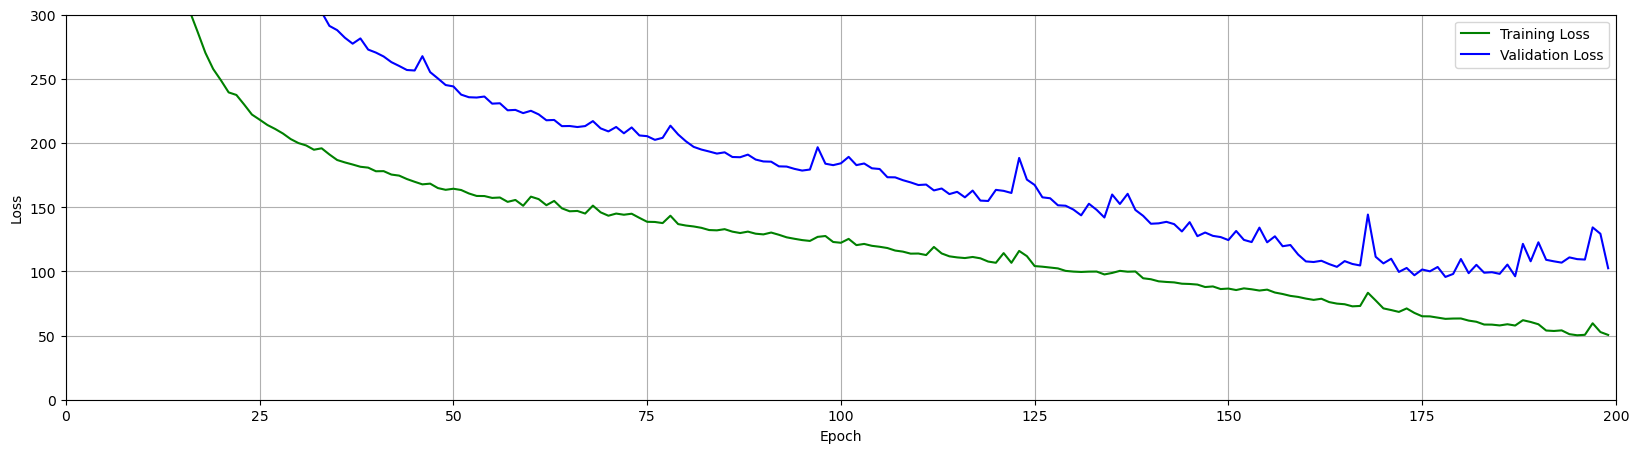

In [109]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 200])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

plot_loss(history)

y_pred = np.array(model.predict(X_test))

In [110]:
print(y_pred.shape)
print(y_pred.dtype)
print(type(y_pred))
print(Y_test.shape)

(142, 1)
float32
<class 'numpy.ndarray'>
(142,)


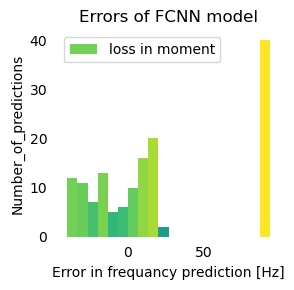

In [118]:
losses = y_pred[0] - Y_test
'''
for i in range(len(losses)):
    if(losses[i] >= 25):
        losses[i] = 0
'''
fig, axs = plt.subplots(1, 1,
                        figsize =(3, 3),
                        tight_layout = True)
legend = ['loss in moment']

for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

# Add x, y gridlines
'''axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)'''

# Add Text watermark
'''fig.text(0.9, 0.15, 'Jeeteshgavande30',
         fontsize = 12,
         color ='red',
         ha ='right',
         va ='bottom',
         alpha = 0.7)'''

#
n_bins = 20
N, bins, patches = axs.hist(losses, bins = n_bins)
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
# Adding extra features   
plt.xlabel("Error in frequancy prediction [Hz]")
plt.ylabel("Number_of_predictions")
plt.legend(legend)
plt.title('Errors of FCNN model')
 
# Show plot
plt.show()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_179 (Dense)           (None, 7)                 56        
                                                                 
 dense_180 (Dense)           (None, 64)                512       
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dense_181 (Dense)           (None, 16)                1040      
                                                                 
 batch_normalization_1 (Bat  (None, 16)                64        
 chNormalization)                                    

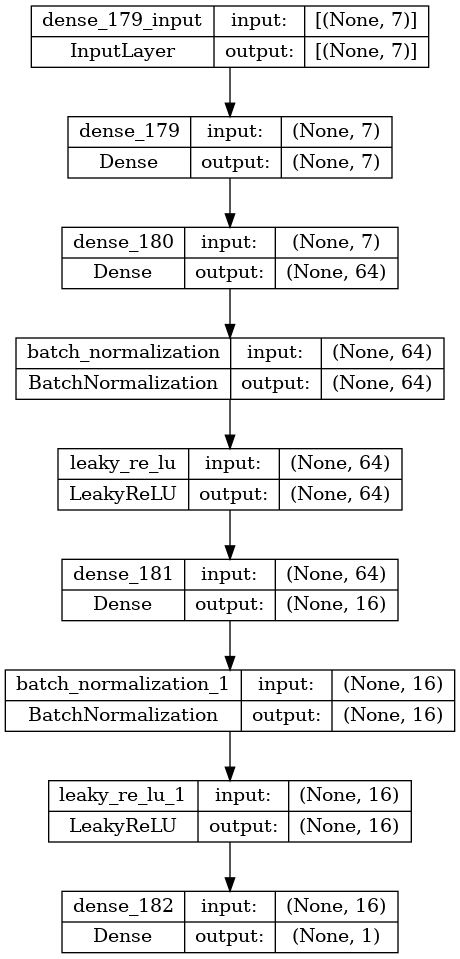

In [119]:
from keras import models  
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation  
from keras_visualizer import visualizer 
from keras import layers 
from keras.utils import plot_model

print(model.summary())

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

<h3>3) Recurent Regression model  </h3>

In [121]:
from keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from tensorflow.keras.callbacks import ReduceLROnPlateau
model = Sequential()

model.add(Dense(7, activation='relu', input_shape = (X_train.shape[1], )))

model.add(Dense(64,
                activity_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(16,
                activity_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(1))


In [129]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5, min_lr=0.000001, verbose=1)
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mse', 'mae'])

history = model.fit(X_train, Y_train, validation_split=0.4, epochs=1200, batch_size = 100)


Epoch 1/1200
4/4 [==============================] - 1s 38ms/step - loss: 22.2869 - mse: 22.2089 - mae: 3.5953 - val_loss: 156.1493 - val_mse: 156.0825 - val_mae: 5.6166
Epoch 2/1200
4/4 [==============================] - 0s 8ms/step - loss: 21.4230 - mse: 21.3446 - mae: 3.4250 - val_loss: 171.9446 - val_mse: 171.8817 - val_mae: 7.5361
Epoch 3/1200
4/4 [==============================] - 0s 8ms/step - loss: 14.2552 - mse: 14.1788 - mae: 2.7651 - val_loss: 151.9641 - val_mse: 151.9002 - val_mae: 5.7223
Epoch 4/1200
4/4 [==============================] - 0s 8ms/step - loss: 19.9400 - mse: 19.8629 - mae: 3.4281 - val_loss: 159.3253 - val_mse: 159.2616 - val_mae: 5.7633
Epoch 5/1200
4/4 [==============================] - 0s 7ms/step - loss: 10.6208 - mse: 10.5431 - mae: 2.3444 - val_loss: 232.5559 - val_mse: 232.4954 - val_mae: 10.3263
Epoch 6/1200
4/4 [==============================] - 0s 7ms/step - loss: 17.9339 - mse: 17.8570 - mae: 3.1288 - val_loss: 223.3943 - val_mse: 223.3330 - val_ma

'\nhistory = model.fit(X_train, Y_train, \n                    \n          nb_epoch = 50, \n          batch_size = 128, \n          verbose=1, \n          validation_data=(X_test, Y_test),\n          shuffle=True,\n          callbacks=[reduce_lr])\n'

5/5 [==============================] - 0s 1ms/step


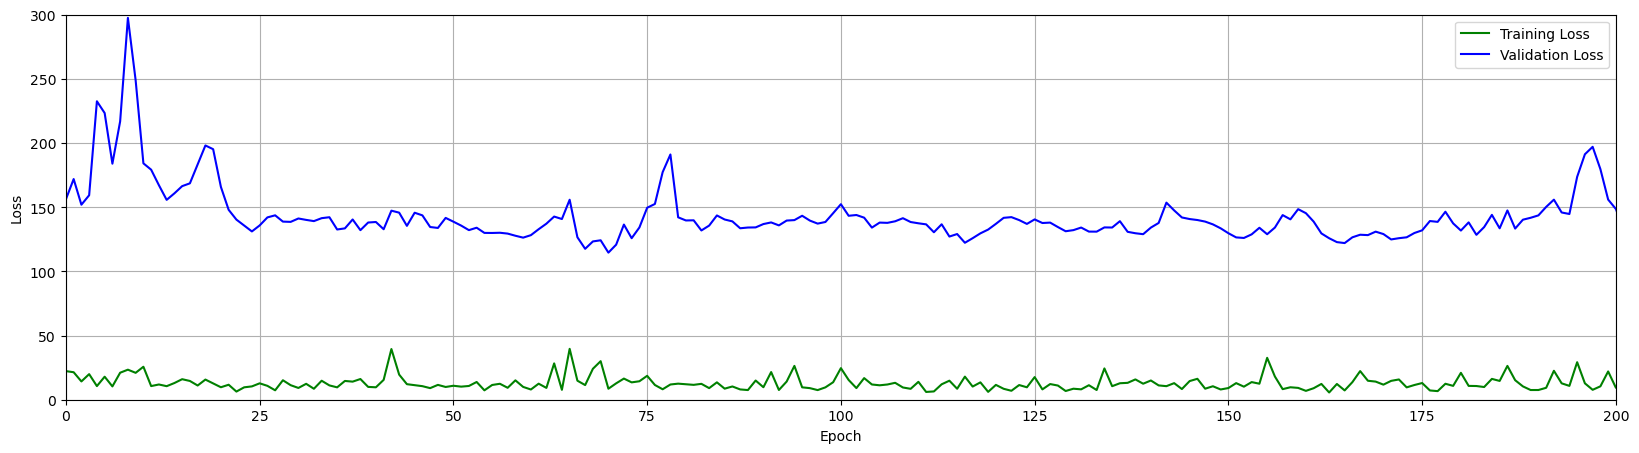

In [130]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 200])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

plot_loss(history)

y_pred = np.array(model.predict(X_test))

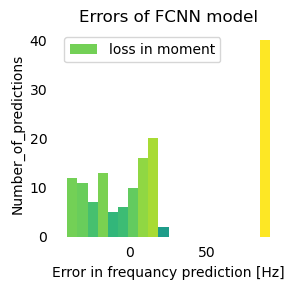

In [131]:
losses = y_pred[0] - Y_test

for i in range(len(losses)):
    if(losses[i] >= 25):
        losses[i] = 0

fig, axs = plt.subplots(1, 1,
                        figsize =(3, 3),
                        tight_layout = True)
legend = ['loss in moment']

for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

# Add x, y gridlines
'''axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)'''

# Add Text watermark
'''fig.text(0.9, 0.15, 'Jeeteshgavande30',
         fontsize = 12,
         color ='red',
         ha ='right',
         va ='bottom',
         alpha = 0.7)'''

#
n_bins = 20
N, bins, patches = axs.hist(losses, bins = n_bins)
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
# Adding extra features   
plt.xlabel("Error in frequancy prediction [Hz]")
plt.ylabel("Number_of_predictions")
plt.legend(legend)
plt.title('Errors of FCNN model')
 
# Show plot
plt.show()